In [4]:
using Jacobi

In [5]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [1/(b-a) -1/(b-a);-1/(b-a) 1/(b-a) ]

fun(x) = (1.0 - 4*pi^2)*sin(2*pi*x) 
resp(x) = sin(2*pi*x)

function test(Nel)
  a = -1.0
  b = 1.0
  Ndof = Nel + 1
  xn = [linspace(a,b,Nel+1);];
  idx = 2:Ndof-1
  dof_map = zeros(Int, 2, Nel)
  for i = 1:Nel
      dof_map[1,i] = i
      dof_map[2,i] = i+1
  end

  #calcula dM
  dl = zeros(Ndof-1)
  dp = zeros(Ndof)

  ##
  for e = 1:Nel
      dMe = stiff_matrix(xn[e], xn[e+1])
      Me = mass_matrix(xn[e], xn[e+1])
      for i = 1:2
          ig = dof_map[i,e]
          for k = 1:2
              kg = dof_map[k,e]
              if kg == ig #principal
                  dp[kg] += -dMe[k,i] + Me[k,i]
              end
              if kg == ig + 1 && kg > 1#low
                  dl[kg-1] += -dMe[k,i] + Me[k,i]
              end
          end
      end
  end

  Tri_dM = SymTridiagonal(dp[2:end-1],dl[2:end-1]) 

    #calcula F
    fe = fun(xn);
    F = zeros(Ndof)
    for e = 1:Nel
        Me = mass_matrix(xn[e], xn[e+1])
        Fe = Me * fun(xn[e:(e+1)])
        for i = 1:2
            ig = dof_map[i,e]
            F[ig] += Fe[i]
        end
    end
            
    F = F[idx]
    #Solução
    u = Tri_dM\F
    u = [0.0; u; 0.0];
    #calcula erro
    e1 = u - resp(xn)

    return maxabs(e1)
end

test (generic function with 1 method)

In [6]:
using PyPlot

In [7]:
n = 5:500 # linspace(5,500,495)
erros = Float64[test(Nel) for Nel in n]
#loglog(n,erros)
#title("erro de Nel in $n")
n2 = Float64[n;];


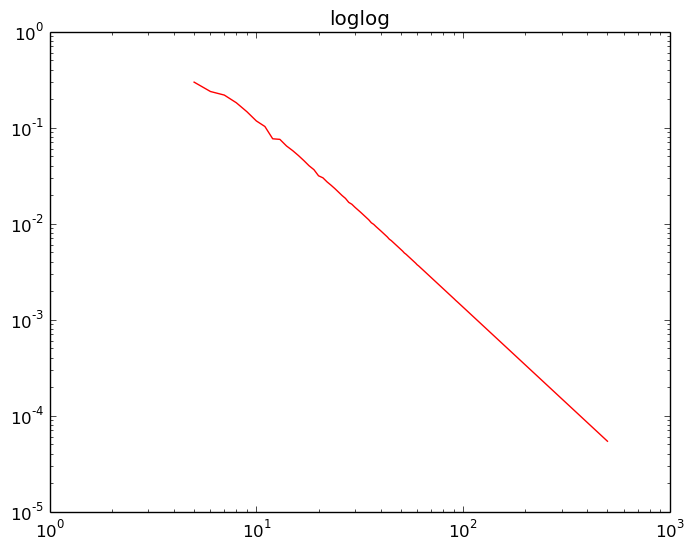

PyObject <matplotlib.text.Text object at 0x7fa59fc87550>

In [8]:
loglog(n2,erros,"r")
title("loglog")

In [14]:
erros

496-element Array{Float64,1}:
 0.297102  
 0.237284  
 0.217872  
 0.18131   
 0.146271  
 0.117229  
 0.102579  
 0.076374  
 0.0753156 
 0.0642561 
 0.0574396 
 0.0510068 
 0.0451676 
 ⋮         
 5.64607e-5
 5.62296e-5
 5.60017e-5
 5.577e-5  
 5.55482e-5
 5.53227e-5
 5.51003e-5
 5.48786e-5
 5.46577e-5
 5.44376e-5
 5.42205e-5
 5.39998e-5

In [10]:
Pkg.add("CurveFit");

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of CurveFit
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [11]:
using CurveFit

In [12]:
typeof(erros)
power_fit(n2,erros)

2-element Array{Float64,1}:
 12.0064 
 -1.97882

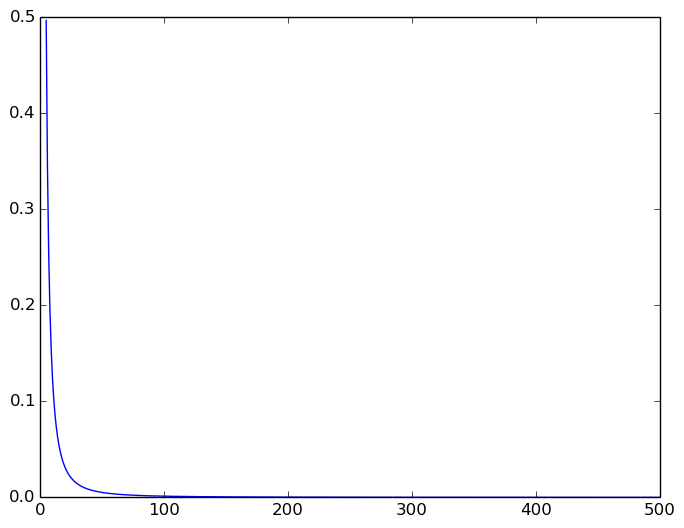

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa59f88efd0>

In [13]:
fit(x) = 12.0064*x.^-1.97882
x = linspace(5,500,495)
plot(x,fit(x))